In [37]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
from scipy import stats

In [91]:
file = 'C:\\Users\\hades\\Downloads\\dataset práctica 1\\transfusion.data'

In [92]:
df = pd.read_csv(file, encoding='latin', error_bad_lines=False)
df.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


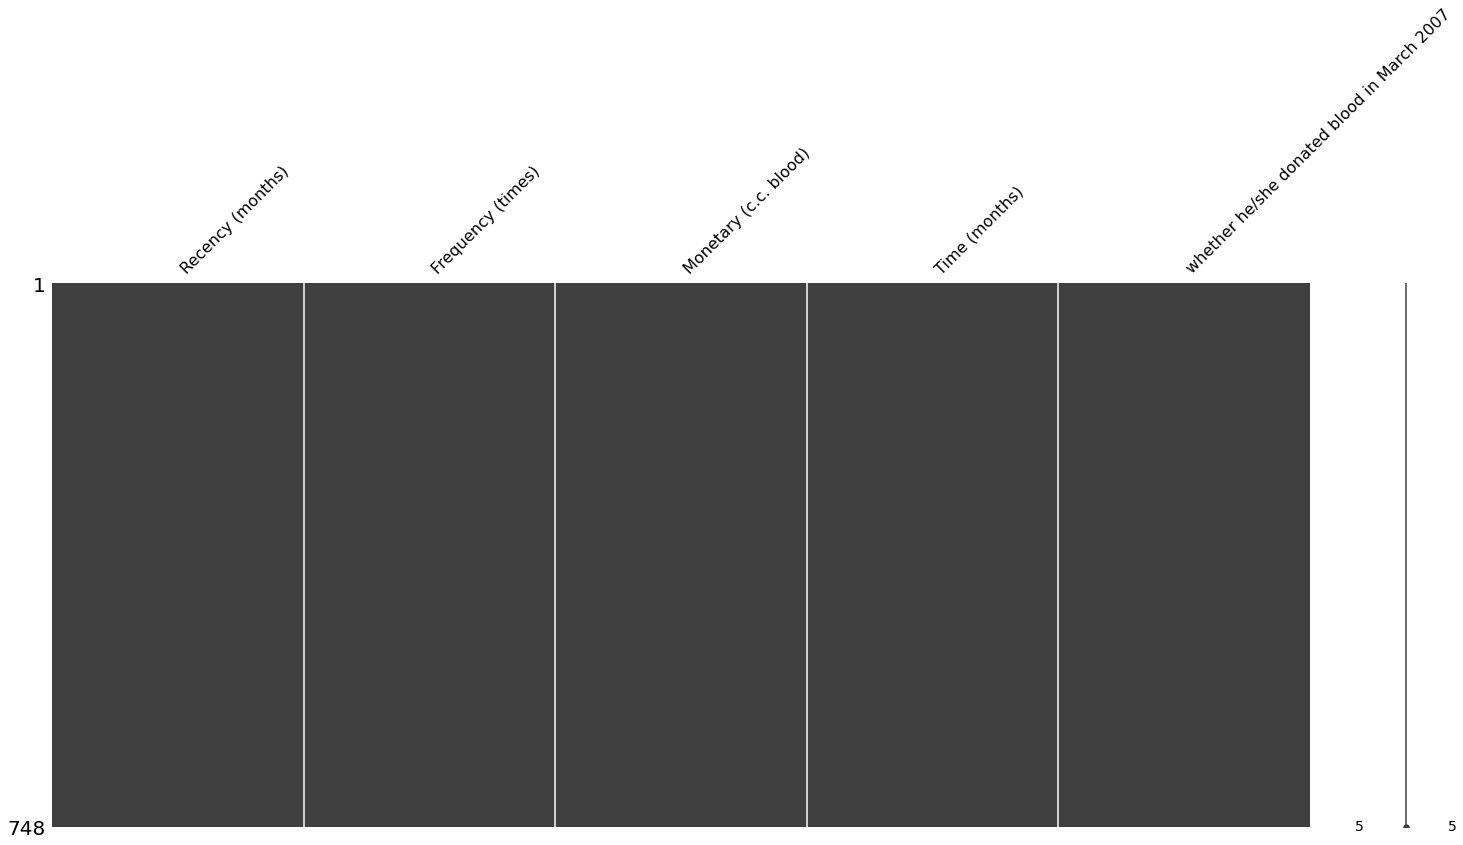

In [93]:
msno.matrix(df)

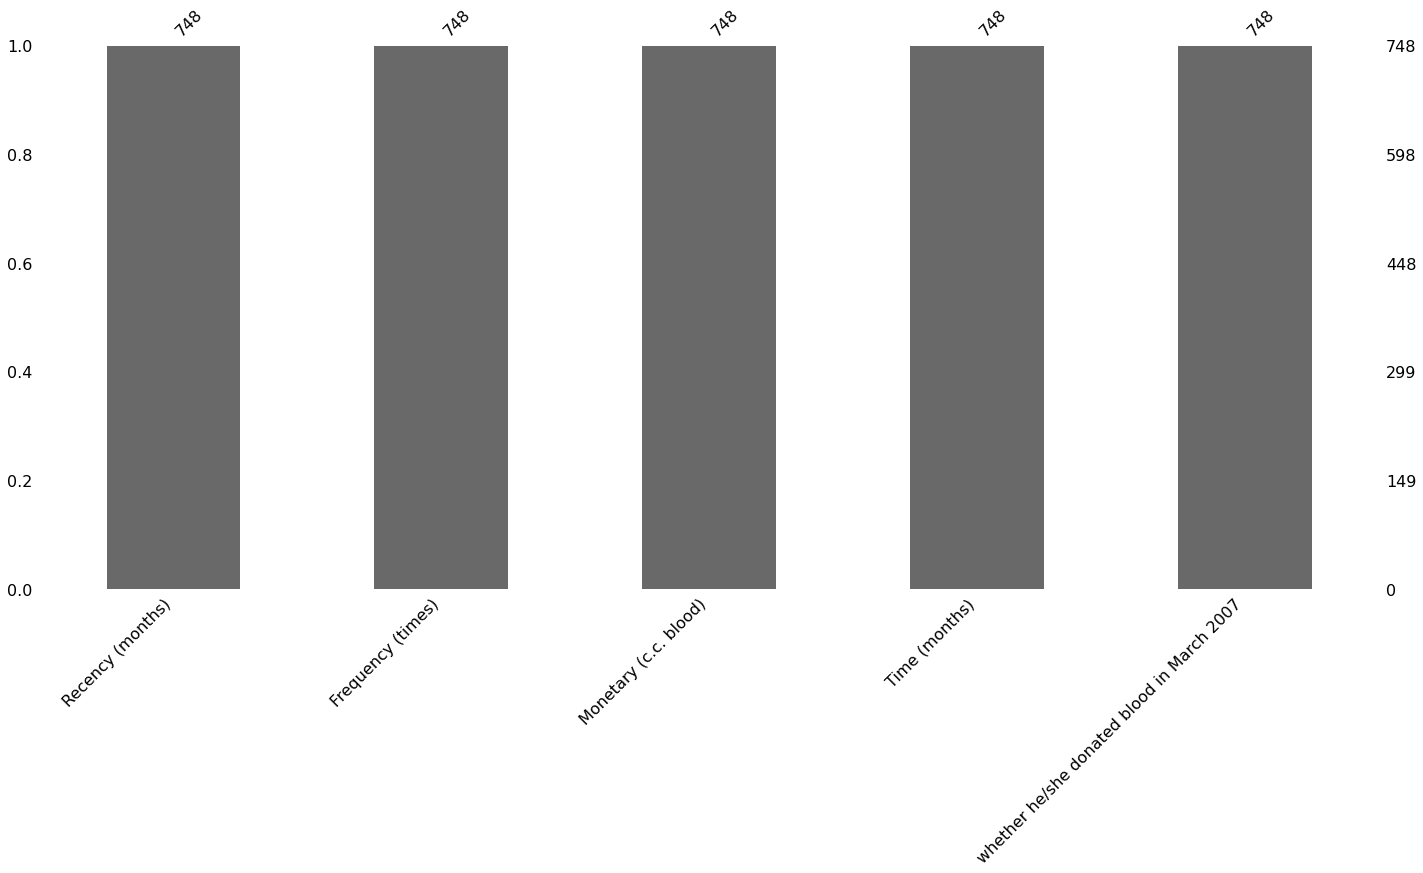

In [94]:
msno.bar(df)

In [95]:
def panda_strip(x):
    r =[]
    for y in x:
        if isinstance(y, str):
            y = y.strip()

        r.append(y)
    return pd.Series(r)

df = df.apply(lambda x: panda_strip(x))

In [96]:
df.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [109]:
items = (df['Recency (months)'].unique())
items

array([ 2,  0,  1,  4,  5,  9,  3, 12,  6, 11, 10, 13,  8, 14,  7, 16, 15,
       23, 21, 18, 22, 26, 35, 38, 40, 74, 20, 17, 25, 39, 72],
      dtype=int64)

In [110]:
#Preprocesamiento
encoded_vals = []

for index, row in df.iterrows():
    labels = {}
    uncommons = list(set(items) - set(row))
    commons = list(set(items).intersection(row))
    for uc in uncommons:
        labels[uc] = 0
    for com in commons:
        labels[com] = 1
    encoded_vals.append(labels)

In [111]:
ohe_df = pd.DataFrame(encoded_vals)
ohe_df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,25,26,35,38,39,40,72,74
0,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [112]:
freq_items = apriori(ohe_df, min_support=0.1, use_colnames=True, verbose=1)
freq_items.head()

Processing 87 combinations | Sampling itemset size 3


,support,itemsets
0,0.764706,(0)
1,0.431818,(1)
2,0.346257,(2)
3,0.133690,(3)
4,0.291444,(4)


In [113]:
freq_items.itemsets.unique()

array([frozenset({0}), frozenset({1}), frozenset({2}), frozenset({3}),
       frozenset({4}), frozenset({11}), frozenset({14}), frozenset({16}),
       frozenset({0, 1}), frozenset({0, 2}), frozenset({0, 3}),
       frozenset({0, 4}), frozenset({0, 11}), frozenset({0, 14}),
       frozenset({0, 16}), frozenset({1, 2}), frozenset({1, 4})],
      dtype=object)

In [115]:
rules = association_rules(freq_items, min_threshold=0.1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(0),(1),0.764706,0.431818,0.196524,0.256993,0.595142,-0.133690,0.764706
1,(1),(0),0.431818,0.764706,0.196524,0.455108,0.595142,-0.133690,0.431818
2,(0),(2),0.764706,0.346257,0.241979,0.316434,0.913870,-0.022806,0.956371
3,(2),(0),0.346257,0.764706,0.241979,0.698842,0.913870,-0.022806,0.781297
4,(0),(3),0.764706,0.133690,0.108289,0.141608,1.059231,0.006055,1.009225
5,(3),(0),0.133690,0.764706,0.108289,0.810000,1.059231,0.006055,1.238390
6,(0),(4),0.764706,0.291444,0.196524,0.256993,0.881793,-0.026345,0.953633
7,(4),(0),0.291444,0.764706,0.196524,0.674312,0.881793,-0.026345,0.722452
8,(0),(11),0.764706,0.156417,0.122995,0.160839,1.028271,0.003382,1.005270
9,(11),(0),0.156417,0.764706,0.122995,0.786325,1.028271,0.003382,1.101176
